In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Part 1 Creating the data
m = 2
b = 0.5
x = np.linspace(0,4, 100)
y = m * x + b + np.random.randn(*x.shape) + .25
plt.scatter(x, y)

class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
        # Part 3 Below
    def __call__(self, x):
        return self.weight * x + self.bias


In [ ]:
# Part 4 Loss Function
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))

In [86]:
# Part 5 Training 
# Build the training loop
# Train the model to adjust the weights and biases
# Doing from scratch, normally will not
def train(model, x, y, learning_rate):
    # Higher learning_rate faster, but less fine tuning
    # Lower learning_rate slower, more fine tuning
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
        
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

In [87]:
# Part 6 Actually building the training loop

model = Model()
epochs = 1000000
learning_rate = 0.025
for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
   # print(f"Epoch: {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

In [88]:
# Part 7 Testing and Evaluating
print(model.weight.numpy())
print(model.bias.numpy())

1.9974757
0.71206224


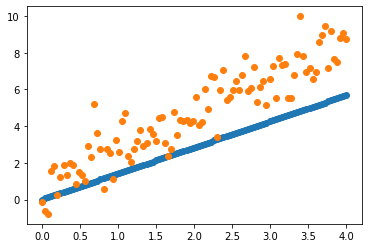

In [89]:
new_x = np.linspace(0,4,100)
new_y = model.weight.numpy() * new_x * model.bias.numpy()
plt.scatter(new_x,new_y)
plt.scatter(x,y)